In [43]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [44]:
# Import dataset
track_df = pd.read_csv('tracks_features.csv', header=0)
track_df.describe()
print(track_df.columns)

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')


In [71]:
# clean df
# compute duration in seconds
track_df['duration_s'] = track_df['duration_ms'] / 1000

# compute 0/1 mask for explicit
track_df['explicit_bool'] = track_df.apply(lambda row: 1 if row['explicit'] else 0, axis=1)

# remove tempo values of 0
track_df['tempo'] = track_df['tempo'].replace(0, np.nan)
# track_df['tempo'] = track_df.apply(lambda row: row['tempo'] if row['tempo'] > 0 else None, axis=1)
track_df['tempo'].min()

# remove year values of 0
track_df['year'] = track_df['year'].replace(0, np.nan)

# remove time signature values of 0
track_df['time_signature'] = track_df['time_signature'].replace(0, np.nan)

# remove key values of -1
track_df['key'] = track_df['key'].replace(-1, np.nan)

In [72]:
def make_hist(X: np.array, x_label, y_label, title, bins=None, range=None, color='orange', label=None, fig=None, ax=None, x_ticks=None):
    if not fig or not ax:
        fig, ax = plt.subplots()
    if range:
        X = X[(X >= range[0]) & (X <= range[1])]
    ax.hist(X, bins=bins, range=range, color=color, histtype='bar', align='mid', rwidth=0.85, density=True, label=label, )
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    if x_ticks:
        ax.set_xticks(x_ticks[0], x_ticks[1])
    return fig, ax

def print_descriptives(X: pd.Series, name, acc=3):
    # comb out NA values
    X_stat = X[~(pd.isna(X))]
    print(f'{name} has:\nmean: {np.mean(X_stat):.3f}')
    print(f'median: {np.median(X_stat):.3f}')
    print(f'standard deviation: {np.std(X_stat):.3f}')
    print(f'number of values: {len(np.unique(X_stat))}')
    print(f'count: {X_stat.count()}')
    print(f'interval: ({np.min(X_stat):.3f}, {np.max(X_stat):.3f})')


In [101]:
print(track_df.columns)
col_names = ['explicit_bool', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration_s', 'year']
num_bins = [2, 40, 40, 12, 40, 2, 40, 40, 40, 40, 40, 40, 4, 40, 20]
options = {
    'explicit_bool': {
        'x_ticks': [
            [0.25, 0.75],
            ['Not Explicit', 'Explicit']
        ],
        'bins': 2
    },
    'mode' : {
        'x_ticks': [
            [0.25, 0.75],
            ['Minor', 'Major']
        ],
        'bins':2
    },
    'time_signature' : {
        'x_ticks': [
            [1, 2, 3, 4, 5],
            [str(int(x)) + '/4' for x in [1, 2, 3, 4, 5]]
        ],
        'bins': [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
    },
    'key' : {
        'x_ticks': [
            [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
            ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B']
        ],
        'bins': [
            -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5
        ]
    }
}
print(col_names)

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date', 'duration_s',
       'explicit_bool'],
      dtype='object')
['explicit_bool', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration_s', 'year']


Explicit_bool has:
mean: 0.069
median: 0.000
standard deviation: 0.253
number of values: 2
count: 1204025
interval: (0.000, 1.000)
----------------------
Danceability has:
mean: 0.493
median: 0.501
standard deviation: 0.190
number of values: 1362
count: 1204025
interval: (0.000, 1.000)
----------------------
Energy has:
mean: 0.510
median: 0.524
standard deviation: 0.295
number of values: 3441
count: 1204025
interval: (0.000, 1.000)
----------------------
Key has:
mean: 5.194
median: 5.000
standard deviation: 3.537
number of values: 12
count: 1204025
interval: (0.000, 11.000)
----------------------
Loudness has:
mean: -11.809
median: -9.791
standard deviation: 6.982
number of values: 39805
count: 1204025
interval: (-60.000, 7.234)
----------------------
Mode has:
mean: 0.671
median: 1.000
standard deviation: 0.470
number of values: 2
count: 1204025
interval: (0.000, 1.000)
----------------------
Speechiness has:
mean: 0.084
median: 0.045
standard deviation: 0.116
number of values: 1653

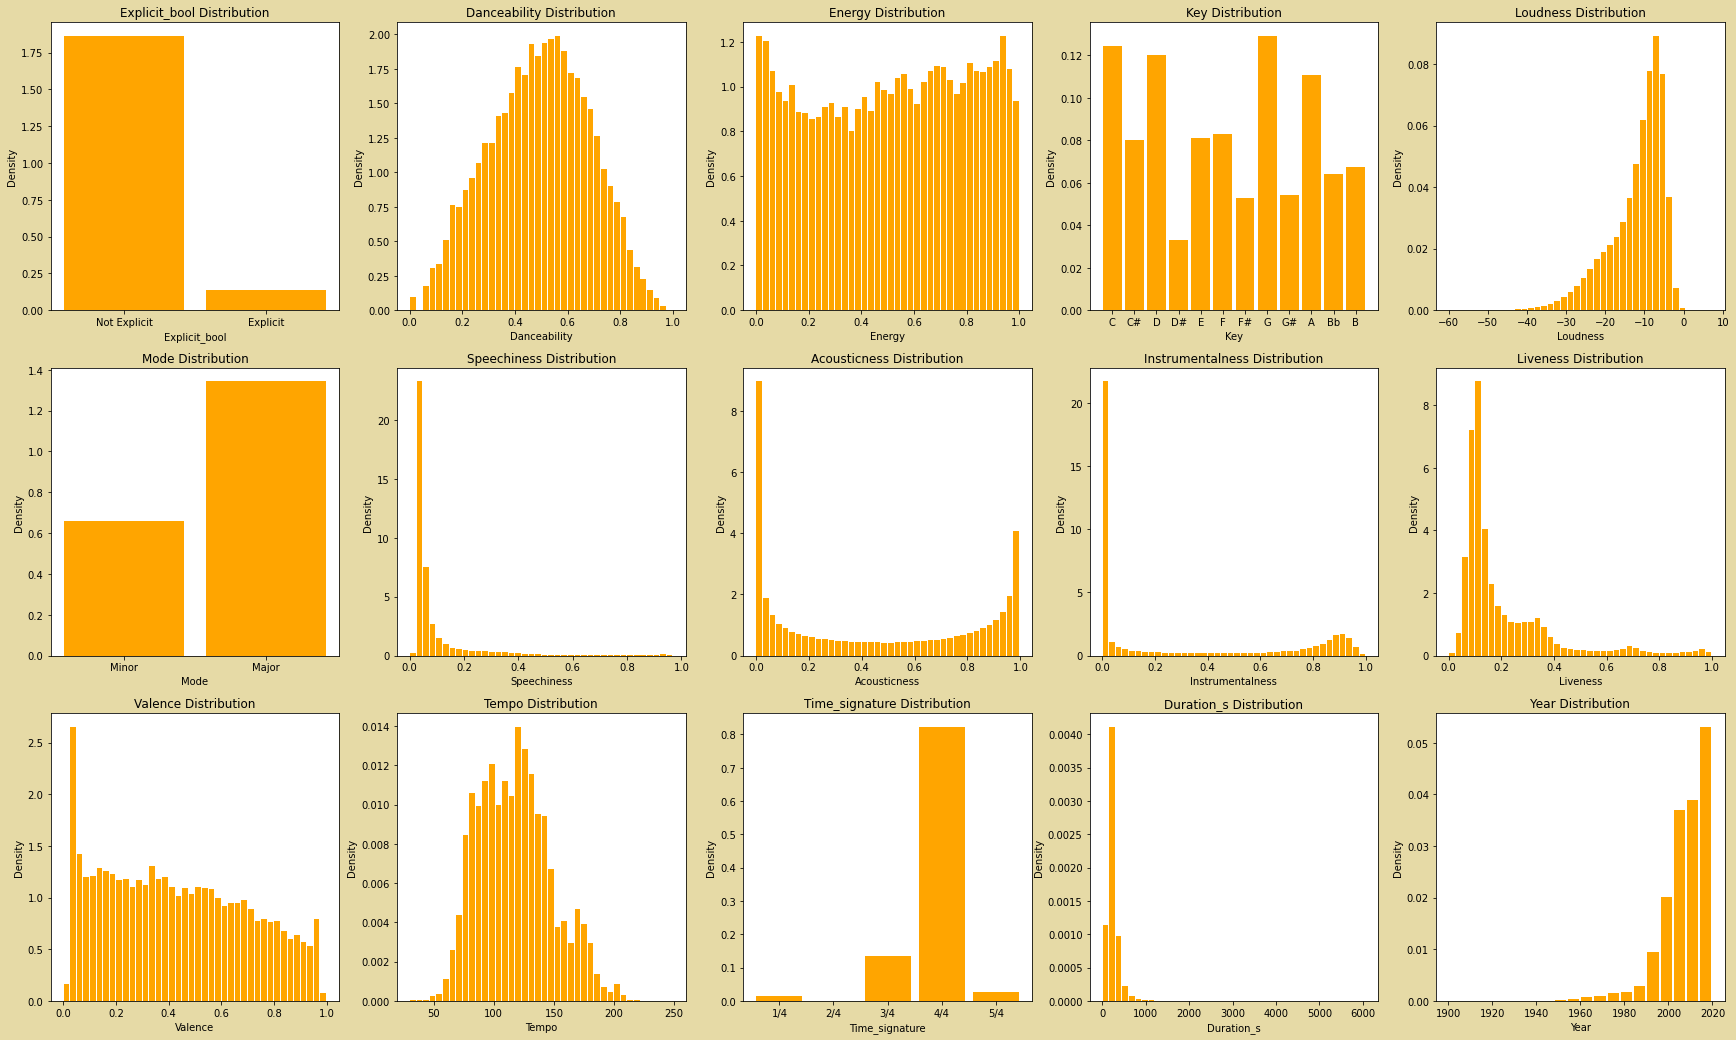

In [102]:
## Analyze all numerics
rows = 3
cols = 5
fig, axs = plt.subplots(rows, cols)
i = 0
for axs_list in axs:
    for ax in axs_list:
        # Get current column name and generate descriptive name
        curr_col = col_names[i]
        desc_name = curr_col.capitalize()

        # generate hist
        try:
            if curr_col in options:
                make_hist(track_df[curr_col], desc_name, 'Density', desc_name + ' Distribution', fig=fig, ax=ax, **options[curr_col])
            else:
                make_hist(track_df[curr_col], desc_name, 'Density', desc_name + ' Distribution', fig=fig, ax=ax, bins=num_bins[i])
            # if curr_col == 'duration_s':
            #     make_hist(track_df[curr_col], desc_name, 'Density', desc_name + ' Distribution', fig=fig, ax=ax, range=(0, 1000), bins=num_bins[i])
            # elif curr_col == 'explicit_bool':
            #     make_hist(track_df[curr_col], desc_name, 'Density', desc_name + ' Distribution', fig=fig, ax=ax, bins=num_bins[i])
            # else:
            #     make_hist(track_df[curr_col], desc_name, 'Density', desc_name + ' Distribution', fig=fig, ax=ax, bins=num_bins[i])
        except:
            print(f'Could not generate histogram for {desc_name}')
        # print descriptives
        try:
            print_descriptives(track_df[curr_col], desc_name)
        except:
            print(f'Could not print descriptives for {desc_name}')
        print('----------------------')
        i += 1
fig.set_size_inches(cols * 6, rows * 6)
fig.set_facecolor('#e6daa6')
fig.show()